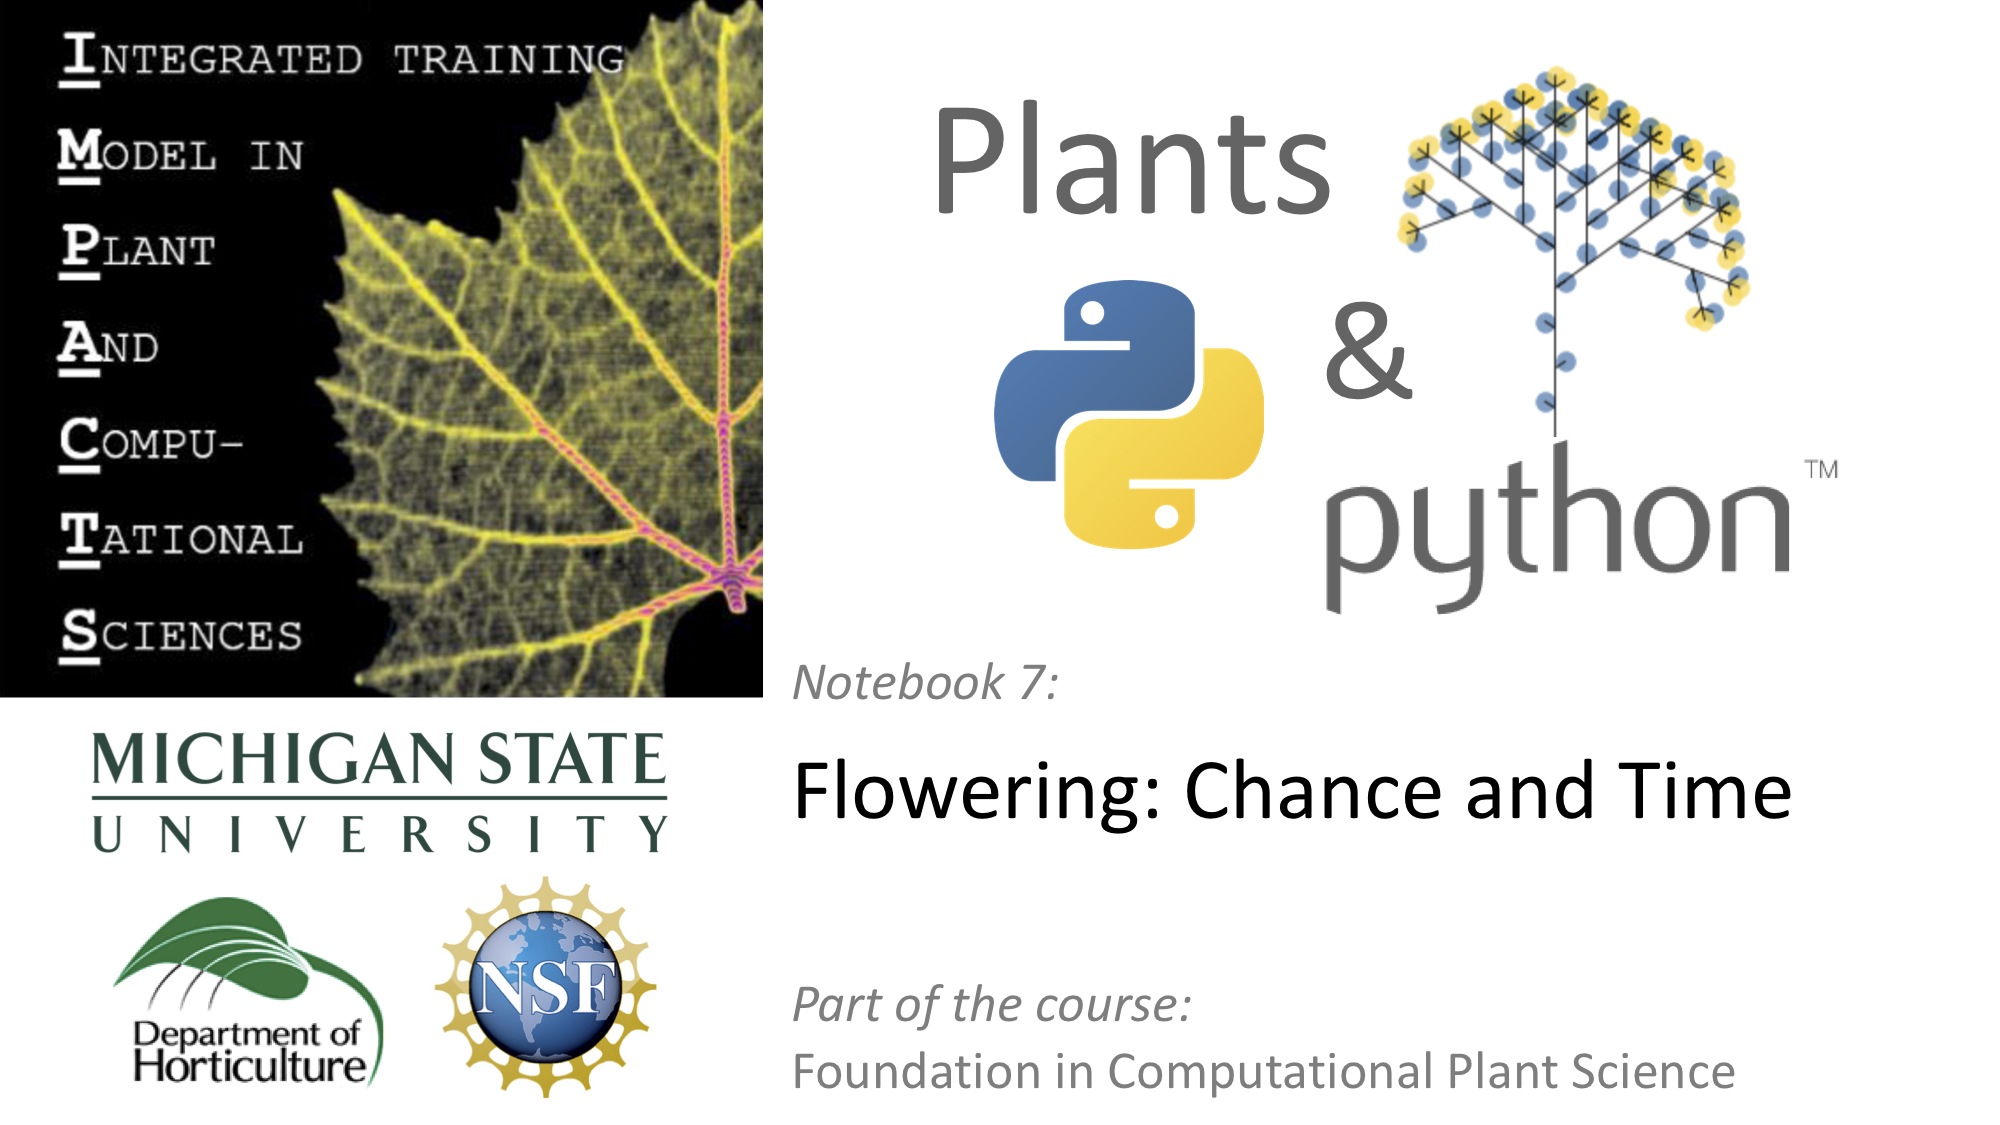

_____
# Flowering: Chance and Time

In the previous notebook, we learned about fractals, L-systems, and how they can be used to model the branching architectures of plants. L-systems create convincing reproductions of plant architecture. However, as presented, these models don't behave as plants do. One of the most crucial missing components is a representation of how plants ***develop***. In this notebook, we extend L-systems further as a model of plant architecture to include developmental principles, focusing on modeling chance and the transition to flowering, using the building blocks of plants themselves–meristems, internodes, leaves, and flowers–as components.

This notebook is based on *The Algorithmic Beauty of Plants*, [Chapter 3, Section 1: Developmental models of herbaceous plants](http://algorithmicbotany.org/papers/abop/abop-ch3.pdf) (Przemyslaw Prusinkiewicz and Aristid Lindenmayer, Springer-Verlag, 1990, ISBN 978-0-387-97297-8). The code used in this notebook is adapted from Paul Butler's [Fractal Generation with L-Systems](https://nb.paulbutler.org/l-systems/) tutorial.

____
## An element of chance

The L-systems models of plant architecture you built in the last notebook are deterministic: they will produce ***exactly*** the same results with the same axiom, production rules, and iterations each time. Plants, however, are different. Even if ***genetically identical*** and grown in ***seemingly identical environmental conditions***, it would be exceedingly difficult, if not impossible, to obtain ***exactly*** the same plant morphology twice. What a plant is genetically, its ***genotype***, can nearly be fixed. Examples of this include plants that have been inbred, or repeatedly self-fertilized (like maize) or clones (like grapevines). Environmental differences can be controlled for and made uniform, but never precisely, and plants will respond to these minute differences in their environment (this is called ***plasticity***). But even if genetics and the environment were theoretically fixed, there would still be an element of chance. That is, there is a ***stochastic component*** to plant development. The magnitude of stochasticity governing plant development varies depending on species and context, but it is always present, even if small.

Let's review L-systems and the functions you used from last notebook, but modify them to allow for stochasticity. Review [Chapter 1, Section 1.7](http://algorithmicbotany.org/papers/abop/abop-ch1.pdf) from the *The Algorithmic Beauty of Plants*.

The `plot_coords()` function takes `x` and `y` coordinates, unzips them into separate lists of `X` and `Y` values, and plots them.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
nan = float('nan')

def plot_coords(coords, lw=0.5, bare_plot=True):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.plot(X, Y, lw=lw, c='k')

The `transform_sequence()` function takes an L-systems sequence and given a set of production rules provided as a dictionary, uses them to return a transformed, rewritten output.

In [36]:
def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)


For today's notebook, we need to modify the `transform_sequence()` function to add an element of chance. 

Create a new function called `stochastic_sequence()`. `stochastic_sequence()` will use the `random.choice()` function from the package `random`. `random.choice()` will randomly select an element from a *list of dictionaries.*

Do the following to create your new function, `stochastic_sequence()`:

* Copy and paste `transform_sequence()`. Rename your new function `stochastic_sequence()`. Its inputs are `sequence` and `transformations`. ***NOTE***: In `transform_sequence()` the argument `transformations` is a dictionary with many rules, but in the new function, it is a ***list*** of ***dictionaries***, each dictionary one of the possible production rule choices.
* Add a new line and create a variable called `choice`. Set `choice` equal to the `random.choice()` output of `transformations`. That is, use `random.choice()` to select one of the dictionaries from the list `transformations` randomly and store it in `choice`
* Just like `transform_sequence()`, return the transformed sequence, but using the randomly selected dictionary from `choice`, not `transformations`. The sequence to be transformed using `choice` is `sequence`

In [ ]:
import random

# Define the function stochastic_sequence() here




In this exercise, we will be using the following axiom and randomly selecting from three possible production rules with equal probability for five iterations. That is, from the starting axiom, for each iteration any of the three production rules can be selected with equal proabability.

```python
axiom = 'F'
rule1 = {'F':'F[+F]F[-F]F'}
rule2 = {'F':'F[+F]F'}
rule3 = {'F':'F[-F]F'}
```

In the cell below, test your new function `stochastic_sequence` with the axiom and a dictionary of the three rules provided above. If it works, your output will be one of the three rule transformations, randomly selected.

***IMPORTANT:*** The input `transformations` is a list of dictionaries and looks likes this: `[{dictionary1}, {dictionary2}, {dictionary3}]`

In [ ]:
# Test your new function stochastic_sequence() here:




The `transform_multiple()` function uses the `transform_sequence()` function to transform an axiom multiple iterations using the production rules.

In [ ]:
def transform_multiple(sequence, transformations, iterations):
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

Let's create a new function called `transform_multiple_stochastic()`. This function is just like `transform_multiple()`, except instead of calling `transform_sequence()`, it calls the `stochastic_sequence()` function you just made.

Create a new function, `transform_multiple_stochastic()`, in the cell below.

In [ ]:
# Create a new function, tranform_multiple_stochastic() here:




Test your function, `transform_multiple_stochastic()`, below. Use the same axiom and set of production rules to randomly choose from as you did before, but let the function run for 5 times.

Run your new function multiple times to see that it is producing random outputs.

In [ ]:
### Test your function transform_multiple_stochastic() here




The `branching_turtle_to_coords()` function takes a turtle program and converts it to coordinates. Review how the function works, how the turtle program is intepretted, and how branching is accomodated using brackets.

In [ ]:
from math import pi, sin, cos
DEGREES_TO_RADIANS = pi / 180

def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state
        
        # Move forward (matches a-j and A-J)
        
        if command.lower() in 'abcdefghijklmnopqrstuvwxyz': 
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            # Add a break in the line if command matches a-j  
            if command.islower():                  
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        # Turn clockwise
        elif command == '+':                       
            state = (x, y, angle + turn_amount)

        # Turn counterclockwise
        elif command == '-':                       
            state = (x, y, angle - turn_amount)

        # Remember current state
        elif command == '[':                      
            saved_states.append(state)

        # Return to previous state
        elif command == ']':                       
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

        # Note: We silently ignore unknown commands

Finally, the `l_plot()` function combines everything together. `transform_multiple()` creates a turtle program, and `branching_turtle_to_coords()` creates coordinates to plot by `plot_coords()`.

In [ ]:
def l_plot(axiom, transformations, iterations=0, angle=45, lw=0.5):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, lw=lw, bare_plot=True)

But we need a new `l_plot()` function that incorporates our new stochastic functions.

In the cell below, create a new function `l_plot_stochastic()` that uses `transform_multiple_stochastic()` instead of `transform_multiple()`.

In [ ]:
# Create a new function l_plot_stochastic() here:




Finally, use your new `l_plot_stochastic()` function to create some random plants!

Run your function over and over to see the variation that you produce.

You can start with the axiom and production rules below for 5 iterations, but change things and explore!

```python
axiom = 'F'
rule1 = {'F':'F[+F]F[-F]F'}
rule2 = {'F':'F[+F]F'}
rule3 = {'F':'F[-F]F'}
angle = 40
iterations = 5
```

In [ ]:
# Put your answer here




____
## Flowering transitions: between chance and determinism

We use stochasticity in modeling when there is no other mechanism known. Sometimes, chance is an excellent modeling tool in itself, and accurately represents the phenomenon we are studying. Other times, randomness is appropriate when used in context, within a deterministic framework.

When considering plant development, there is no process more deterministic than flowering. In many ways, the entire lifecycle of a plant enables flowering. Flowering is reproduction, and within an evolutionary framework, is tied to a plant's fitness. Without flowering, the ability of a plant to efficiently transmit its genes to the next generation is severely compromised.

The ***vegetative phase*** of flowering plant develelopment occurs before a plant transitions to reproduction, or flowering. When a seedling first emerges, it contains at least 1) cotyledon(s) ("embryonic leaves" that are patterned in the seed) and 2) a ***shoot apical meristem***. The shoot apical meristem iteratively produces leaves. Each leaf subtends an axillary meristem, which can itself produce a branch (with more leaves and axillary meristems itself).

As described above, a plant would never flower! Eventually, a ***vegetative meristem*** transitions to a ***reproductive meristem*** and instead of (or in addition to leaves), flowers are produced. (Although, flower parts are just modified leaves, as noted by Goethe in the famous exclamation, "Alles ist Blatt!"). Reproductive meristems, just like vegetative shoots, can branch too! These are called inflorescences, and they will be the subject of the next notebook.

In the exercises below, we will model the transition of vegetative meristems to flowering. These will be very simple models, in which a vegetative meristem produces leaves and then transitions to a reproductive meristem that produces a single flower. These models use L-systems, except now some of the characters correspond to actual biological features. The naming conventions, below, are taken from [Chapter 3, Section 1: Developmental models of herbaceous plants](http://algorithmicbotany.org/papers/abop/abop-ch3.pdf) of *The Algorithmic Beauty of Plants*.

```python````
'a' = vegetative meristem
'A' = reproductive meristem
'L' = leaf
'I' = internode
'K' = flower
```

The production rules we will be using for this notebook are very simple, and essentially lead to a stalk with many leaves terminating in a flower (like a sunflower). We will expand on these rules in the next notebook to create more complicated structures. The production rules, like the characters, reflect processes in plant development. Today, we will be modeling the following production rules:

```python
rule 1 = {'a':'I[L]a'}
rule 2 = {'a':'I[L]A'}
rule 3 = {'A':'K'}
```

1. **Rule 1:** Vegetative growth. The vegetative shoot apical meristem produces successive phytomers, each consisting of a leaf and internode (as well as an axillary meristem, not depicted in the production rule). Importantly, the vegetative meristem `a` also produces another vegetative meristem, `a`. Although in reality the meristem remains intact and its growth is continuous, the propagation of an `a` character in this production rule is related to the stem cell-like behavior of meristems; that is, to maintain a group of cells with the potential to create more organs, by definition this population of cells must both produce differentiated cells (like leaves) as well as more meristematic cells, like themselves.

2. **Rule 2:** Eventually, the vegetative meristem will ***transition*** into a reproductive meristem. The transition is marked by the meristem carrying out a different program (and in our model, a new set of production rules).

3. **Rule 3:** In our model, after a meristem transitions to a reproductive fate, there isn't much left: the reproductive meristem produces a single flower and then it dies! In the next notebook we will explore more elaborate reproductive development, but here we are keeping it simple to focus on modeling the transition to flowering. The last meristem that produces a flower and no other meristems is called the ***terminal meristem***, because without any other meristems, growth terminates. We will be calling the final production rule in which no further growth occurs the ***terminal transformation***.

The progression from a vegetative state to flowering is all but inevitable, but the way in which the production rules do so ranges from chance to completely defined. In the exercises below, we will be exploring different models for the transition to flowering, beginning with chance.

___
## Stochastic mechanism

A simple model is that for each iteration, a probability of selecting Rule 1 or Rule 2 is defined. Using the probability of selecting each, one of the first two rules is selected each time. Once Rule 2 is randomly selected, though, the plant will terminally transition to flowering.

For the following exercises, we will be using L-systems only to create a turtle program string, but not draw it, because each character has meaning and the strings we will be creating are not complicated. So, we will be creating functions like `transform_multiple()` that implement the production rules in different ways to create a developmental program represented by a string.

Before going further, there is a critical line of code in `transform_multiple()` that you have already used multiple times that is worth reviewing, as it will be vital to the functions that you will crafting today. The code is:

```python
sequence = ''.join(transformation.get(c, c) for c in sequence)
```

Using a production rule encoded as a dictionary (`transformation`), the function `.get()` looks up the dictionary key for the character represented by the variable `c`. The rewriting for each character in `sequence` is carried out using the loop. Up until this point, we have been using this code to rewrite `sequence` itself, but you can also store a newly rewritten sequence in a new variable, if needed.

So let's get started writing a function! This function will take assigned probabilities of selecting Rule 1 or Rule 2 with each iteration. Upon selecting Rule 2, the terminal transformation using Rule 3 will be carried out.

Your function will be called `choose_transform_multiple()` and it will use the following inputs:

1. `sequence`: the axiom, a string.
2. `transformation_choice`: a list of dictionaries. Each dictionary is a production rule with a probability of being selected. In this case, transformation_choice will be a list of two dictionaries, Rule 1 and Rule 2.
3. `terminal_transformation`: a single dictionary, the terminal transformation, or Rule 3.
4. `probabilities`: a tuple in the form of (p1, p2), where p1 is the probability of selecting Rule 1 and p2 is the probability of selecting Rule 2. p1 + p2 = 1.

Finally, in your function there will be a "coin flip" to select between "0" or "1" to determine whether Rule 1 or Rule 2 is selected, using the provided probabilities. Read about the [`np.random.choice()` function](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html) and how to use it for this purpose.

Use the pseudo-code provided below to model a stochastic flowering transition!

In [ ]:
import numpy as np
from numpy.random import choice

def choose_transform_multiple(sequence, transformation_choice, terminal_transformation, probabilities):

    coin_flip = # Use np.random.choice() to choose between 0 and 1
                # using the probabilities for Rule 1 and Rule 2
    
    while coin_flip==0:
        # Create a variable to store Rule 1
        # Rewrite sequence using Rule 1
        # Perform another coin flip

        
    if coin_flip==1:
        # Create a variable to store Rule 2
        # Rewrite sequence using Rule 2

        
    final_transform = # Use the terminal transform to rewrite sequence
    
    # Return final_transform

Try out your code and make sure that it works! Use `a` as an axiom, Rules 1 and 2 as the transformation choices, and Rule 3 as the terminal transformation. Try out different probabilities. Can you get plants with more and less leaves? What do you observe? Does your model make sense?

In [41]:
# Try out your function here




Hopefully your function is working! Although it's cumbersome to repeatedly execute the function and keep track of how many leaves the plants have, as that keeps on changing!

Let's use our model to see how many leaves a plant would have on average before flowering for different probabilities. You will run your function a number of times to calculate a mean and standard deviation of the number of leaves plants produce for each probability. You will use two loops: the first will use `linspace()` to iterate over probabilities and the second will, for each probability, run your function `choose_transform_multiple()` many times to calculate a mean and standard deviation.

We will be using the function `.count()`. For a given string (as in `string.count()`), it will return a count of the number of characters in the string matching the argument it is provided.

Use the pseudo-code below to calculate the mean and standard deviation of leaf counts for 100 probability values between 0 and 1. For each probability, run the model 100 times to get an accurate mean and standard deviation (if the code takes too long to run, reduce the number of runs for each probability).

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create an empty list called means
# Create an empty list called stdevs
# Create an empty list called flowering (to store the probabilities of Rule 2 to transition to flowering)

# Create a for loop iterating over 100 steps between 0 and 1 using np.linspace()

    # Create an empty list called leaves (to store the number of leaves for each plant produced per probability)

    # Create a for loop that iterates 100 times using range (reduce this number if code takes too long to run)

        final_transform = choose_transform_multiple() # Fill out your function here. Your probabilities are the
                                                      # variable from the first loop
        
        # Use .count() on final_transform to count the number of "L"s. Store in a variable called leaf_number

        # Append leaf_number to leaves
        
    # Use np.mean() to calculate mean of leaves. Append to list means
    # Use np.std() to calculate the standard deviation of leaves. Append to stdevs
    # Append the probability of Rule 2 (transition to flowering) to the list flowering
        

Now, using your list of means, standard deviations, and probabilities for flowering, let's create a graph of your results!

Use the `plt.errorbar()` [function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html). Set `x` equal to your list `flowering` (the probability of Rule 2, or transition to flowering), `y` equal to `means` (the mean number of leaves for each probability), and `yerr` to `stdevs`, the standard deviation for each estimation of the mean.

In [ ]:
# Put your graph of mean leaf number vs probability of flowering here




___
## The effect of environment

Usually, the regulation of flowering time is not random. Environment often plays an important role in the decision to transition to reproduction. Daylength and temperature are two important factors that many plants rely on to time their decisions to flower.

For example, *cempasúchil* (from the Nahuatl meaning "twenty-petalled") or *flor de muertos*, a bright orange marigold used in Día de Muertos festivities, blooms precisely when it is needed for the celebrations in the late fall. Why does this plant flower so precisely every calendar year exactly when Día de Muertos occurs? *Cempasúchil* flowers below a critical day length of 11 hours. Once this threshold is met, this marigold can flower. Sometimes flowering is not random, sometimes it is clockwork.

Let's write another function to model the effects of daylength on flowering!

Your function will be called `environment_transform_multiple()` and it will use the following inputs:

1. `sequence`: the axiom, a string.
2. `transformation_choice`: a list of dictionaries. Each dictionary is a production rule with a probability of being selected. In this case, transformation_choice will be a list of two dictionaries, Rule 1 and Rule 2.
3. `terminal_transformation`: a single dictionary, the terminal transformation, or Rule 3.
4. `daylight_hours`: a list of daylight hours to run the model on.
5. `days_per_leaf`: this is also known as "plastochron". It is the number of days it takes to produce a leaf. Only for the days a leaf is produced will the hours in the day be tested.
6. `critical_length`: the number of hours ***below*** which a plant will flower

For this function, we will use a new concept: `break`. Break can be placed within loops so that when the `break` statement is reached, the loop terminates, even if it the loop could continue further. In our case, we will allow our loop to iterate over a maximum potential of 365 days. But, if the critical day length is reached before we iterate over all possible values, the loop will exit. Break is useful for exiting loops when it is unknown when a particular condition will be met.

Using the pseudo-code below, write a function for modeling the effects of daylength on flowering time.

In [ ]:
def environment_transform_multiple(sequence, transformation_choice, 
                                   terminal_transformation, daylight_hours, 
                                   days_per_leaf, critical_length):
    
   # Write a for loop to iterate over a range of 365 days
        
        # Create a variable current_day. current_day is the loop variable times days_per_leaf
        # Create a variable current_daylength. current_daylength is the daylight_hours 
        # indexed by current_day
    
        if current_daylength >= critical_length:
            # Create a variable equal to the first production rule, Rule 1
            # Rewrite sequence using Rule 1
        
        elif current_daylength < critical_length:
            # Create a variable equal to the second production rule, Rule 2
            # Rewrite sequence using Rule 2
            # Use the terminal transform to rewrite sequence
            
            break
    
    # Return the final transform sequence



Try out your function below! Let's assume we want to know on what day *cempasúchil* will flower. Use the list of daylight hours below and assume at first a critical daylength of 11 hours.

Count the number of leaves. Is the number what you expect from the list of daylight hours? Is the number off by 1 day from what you might expect at first? Go back to your code and the production rules and try to figure out the *precise* number of leaves you would expect, and how this corresponds to how plants develop (or how we have constructed the model for this). Try setting a different critical daylength and see what happens.

In [ ]:
# Try out your function using daylight_hours and critical_length = 11

daylight_hours = [13,13,13,12,12,12,11,11,11,10,10,10]





___
## Delay mechanism

Besides the environment, another mechanism to time flowering is counting, counting leaves! 

Some plants produce flowers after a fixed number of leaves. Sometimes this is indirect: from the accumulation of a signal that the leaves produce, or that flowering happens after leaves produce a sufficient amount of sugars from photosynthesis (if this is proportional to leaf number and area in a consistent way). In other plants, they literally count: it is developmentally encoded that the vegetative shoot apex transition to reproduction after a certain number of leaves is produced.

Let's write another function, to model counting leaves until flowering!

Your function will be called `delay_transform_multiple()` and it will use the following inputs:

1. `sequence`: the axiom, a string.
2. `transformation_choice`: a list of dictionaries. Each dictionary is a production rule with a probability of being selected. In this case, transformation_choice will be a list of two dictionaries, Rule 1 and Rule 2.
3. `terminal_transformation`: a single dictionary, the terminal transformation, or Rule 3.
4. `leaflimit`: the number of leaves until the transition to flowering is made.

Fill out the pseudo-code below!


In [ ]:
def delay_transform_multiple(sequence, transformation_choice, 
                                   terminal_transformation,
                                   leaflimit):
    
    # Create a variable called leaves that will serve as a leaf count. Set it to 0
    
    # Create a while loop where leaves is less than leaflimit
    
        # Select the first production rule, Rule 1
        # Rewrite the sequence using Rule1

        # Using .count() on sequence, set variable leaves to number of leaves in sequence. This is your counter
    
    # When outside while loop, select second production rule, Rule 2
    # Rewrite the sequence using Rule 2
    # Create the final transformation, rewriting the sequence using Rule 3
            
    # Return the final transformation

Try out your code below! Is the number of leaves what you expect? If not, why?

In [ ]:
# Put your answer here




____
That's all for this lesson! If you are not in the course and are using these materials remotely and would like the answers, feel free to email Dr. Dan Chitwood (Michigan State University, Depts. Horticulture and Computational Mathematics, Science, & Engineering) at dhchitwood [ at ] gmail [ dot ] com